<a href="https://colab.research.google.com/github/olexandryermilov/univ/blob/master/andan/andan3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/olexandryermilov/univ/master/andan/cerealsugar.csv')
df.head()

,Unnamed: 0,year,population
0,1,1851,2.436
1,2,1861,3.230
2,3,1871,3.689
3,4,1881,4.325
4,5,1891,4.833


In [9]:
data = df[['year', 'population']]
X = np.array(data['year'])
y = np.array(data['population'])
data.head()

,year,population
0,1851,2.436
1,1861,3.230
2,1871,3.689
3,1881,4.325
4,1891,4.833


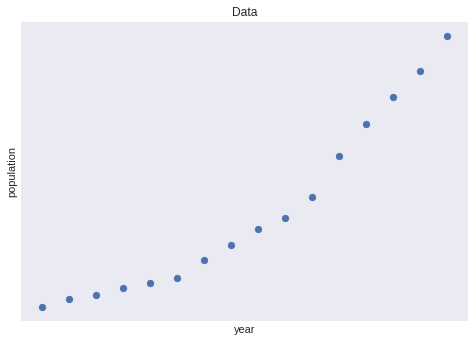

In [10]:
plt.scatter(X, y)
plt.title('Data')
plt.xlabel('year')
plt.ylabel('population')
plt.xticks(())
plt.yticks(())
 
plt.show()

In [11]:
import statsmodels.api as sm
X = sm.add_constant(X)
regress_model = sm.OLS(y, X)
results = regress_model.fit()
print(f'Model coeficients:')
results.params

Model coeficients:


array([-3.37098556e+02,  1.81335147e-01])

In [12]:

results.summary() # no alpha shows that confidence interval for parameters is 95%

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     158.9
Date:                Thu, 29 Nov 2018   Prob (F-statistic):           4.96e-09
Time:                        08:43:03   Log-Likelihood:                -37.242
No. Observations:                  16   AIC:                             78.48
Df Residuals:                      14   BIC:                             80.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -337.0986     27.712    -12.164      0.000    -396.536    -277.661
x1             0.1813      0.014     12.606      0.000       0.150       0.212
==============================================================================
Omnibus:                        3.201   Durbin-Watson:                   0.207
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                1.293
Skew:                           0.240   Prob(JB):                        0.524
Kurtosis:                       1.693   Cond. No.                     8.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
print('The linear regression equation:')
print(f'y = {str(round(results.params[0], 2))} + {str(round(results.params[1], 2))} * x')

The linear regression equation:
y = -337.1 + 0.18 * x


In [0]:
XX = np.array(data['year'])

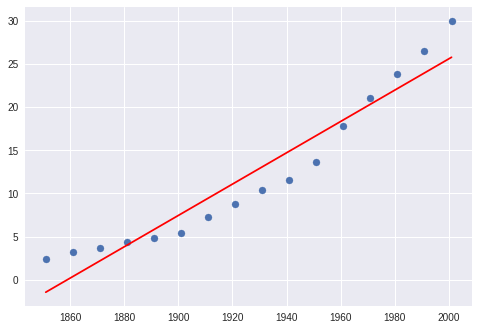

In [16]:
# Plot outputs
plt.scatter(XX, y)
_ = plt.plot(XX, results.params[0] + results.params[1] * XX, 'r')

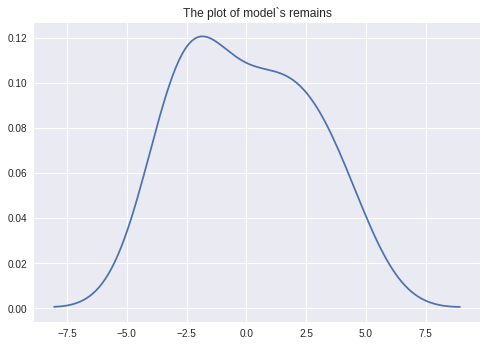

In [17]:
remains = results.resid
sns.distplot(remains, hist=False)
_ = plt.title('The plot of model`s remains')

In [18]:
from scipy.stats import kstest
kstest(remains, 'norm', args=(0, remains.std()))

KstestResult(statistic=0.19018368779647027, pvalue=0.557352341042811)

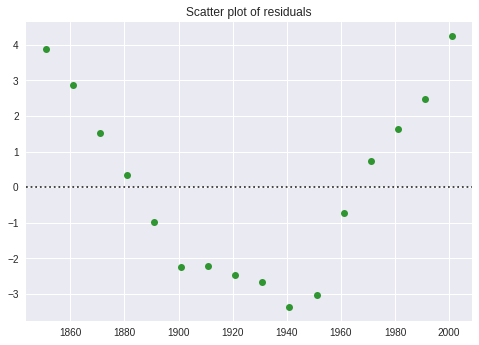

In [19]:

sns.residplot(XX, y, color = 'g')
_ = plt.title('Scatter plot of residuals')

In [20]:
from statsmodels.stats import diagnostic
_, _, _, p_value = diagnostic.het_breuschpagan(remains, X)
p_value

0.7479378122141126

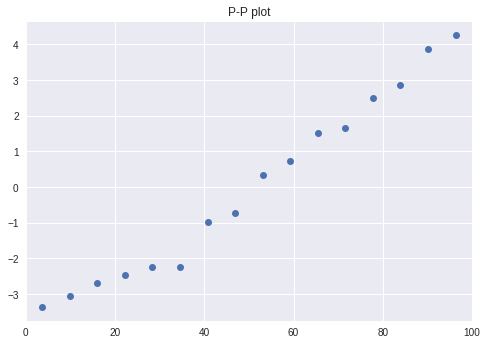

In [21]:
#p-p plot
import probscale
from probscale import probplot
probplot(remains, plottype='pp')
plt.title('P-P plot')
plt.show()

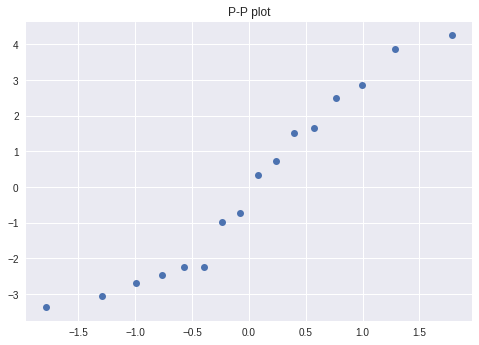

In [22]:
#p-p plot
import probscale
from probscale import probplot
probplot(remains, plottype='qq')
plt.title('P-P plot')
plt.show()